In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Clustering

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
df=pd.read_csv('Company_Employee.csv')
df

,Age,Gender,BusinessTravel,Job Function,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",MaritalStatus,Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),Resign Status
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Male,Travel_Frequently,Research & Development,23,2,4,Married,2571,3,3,5,No
1466,39,Male,Travel_Rarely,Research & Development,6,1,1,Married,9991,3,3,7,No
1467,27,Male,Travel_Rarely,Research & Development,4,3,2,Married,6142,4,3,6,No
1468,49,Male,Travel_Frequently,Sales,2,3,2,Married,5390,3,2,9,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             1470 non-null   int64 
 1   Gender                                          1470 non-null   object
 2   BusinessTravel                                  1470 non-null   object
 3   Job Function                                    1470 non-null   object
 4   Distance Between Company and Home (KM)          1470 non-null   int64 
 5   Education (1 is lowest, 5 is highest)           1470 non-null   int64 
 6   Job Satisfaction (1 is lowest, 4 is highest)    1470 non-null   int64 
 7   MaritalStatus                                   1470 non-null   object
 8   Salary ($)                                      1470 non-null   int64 
 9   Performance Rating (1 is lowest, 4 is highest)  1470

In [ ]:
df.describe()

,Age,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years)
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.728571,6502.931293,3.153741,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.102846,4707.956783,0.360824,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1009.000000,3.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2911.000000,3.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,4919.000000,3.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,8379.000000,3.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,19999.000000,4.000000,4.000000,40.000000


In [ ]:
df.select_dtypes('object').nunique()

Gender            2
BusinessTravel    3
Job Function      3
MaritalStatus     3
Resign Status     2
dtype: int64

This is a dataset collected from HR department in a company, it contains data of 1471 employees.

Age: Employee age

Gender: Employee gender

BusinessTravel: Business travel frequency for the employee

Job Function: Department of the employee

Distance Between Company and Home (KM): distance between company and home

Education (1 is lowest, 5 is highest): Education qualification of employee

Job Satisfaction (1 is lowest, 4 is highest): Employee's job satisfaction

MaritalStatus: Marital status of employee

Salary ($): Employee's salary

Performance Rating (1 is lowest, 4 is highest): Employee's performance rating in the company

Work Life Balance (1 is worst, 4 is best): Work life balance rating

Length of Service (Years): How many years the employee works for the company

Resign Status: Is the employee still with the company

In [ ]:
df.groupby(['Resign Status','Job Function']).mean()

Age  \
Resign Status Job Function                        
No            Human Resources         39.627451   
              Research & Development  37.615942   
              Sales                   37.135593   
Yes           Human Resources         30.083333   
              Research & Development  33.473684   
              Sales                   34.260870   

                                      Distance Between Company and Home (KM)  \
Resign Status Job Function                                                     
No            Human Resources                                       7.588235   
              Research & Development                                8.964976   
              Sales                                                 8.991525   
Yes           Human Resources                                      13.416667   
              Research & Development                               10.263158   
              Sales                                                10.804348   

                                      Education (1 is lowest, 5 is highest)  \
Resign Status Job Function                                                    
No            Human Resources                                      2.960784   
              Research & Development                               2.910628   
              Sales                                                2.960452   
Yes           Human Resources                                      3.000000   
              Research & Development                               2.827068   
              Sales                                                2.836957   

                                      Job Satisfaction (1 is lowest, 4 is highest)  \
Resign Status Job Function                                                           
No            Human Resources                                             2.705882   
              Research & Development                                      2.769324   
              Sales                                                       2.810734   
Yes           Human Resources                                             2.166667   
              Research & Development                                      2.458647   
              Sales                                                       2.521739   

                                       Salary ($)  \
Resign Status Job Function                          
No            Human Resources         7345.980392   
              Research & Development  6630.326087   
              Sales                   7232.240113   
Yes           Human Resources         3715.750000   
              Research & Development  4108.075188   
              Sales                   5908.456522   

                                      Performance Rating (1 is lowest, 4 is highest)  \
Resign Status Job Function                                                             
No            Human Resources                                               3.156863   
              Research & Development                                        3.157005   
              Sales                                                         3.144068   
Yes           Human Resources                                               3.083333   
              Research & Development                                        3.195489   
              Sales                                                         3.108696   

                                      Work Life Balance (1 is worst, 4 is best)  \
Resign Status Job Function                                                        
No            Human Resources                                          2.921569   
              Research & Development                                   2.748792   
              Sales                                                    2.836158   
Yes           Human Resources                                          2.916667   
              Research & Development        

<h3>Employees who resigned in HR have the lowest job satisfaction out of all job functions despite having better work life balance though they tend to travel more for work
<h3>People who resign have much lower salary and years and are younger

In [ ]:
resign = df['Resign Status'].to_list()
resign.append('All')
df_item = pd.crosstab(df['Resign Status'], df['Job Function'], margins = True).reindex(resign, axis = 0).reset_index()
#remove index name
df_item.columns.name = None
df_item.head(2)

,Resign Status,Human Resources,Research & Development,Sales,All
0,Yes,12,133,92,237
1,No,51,828,354,1233


<h2>Correlation

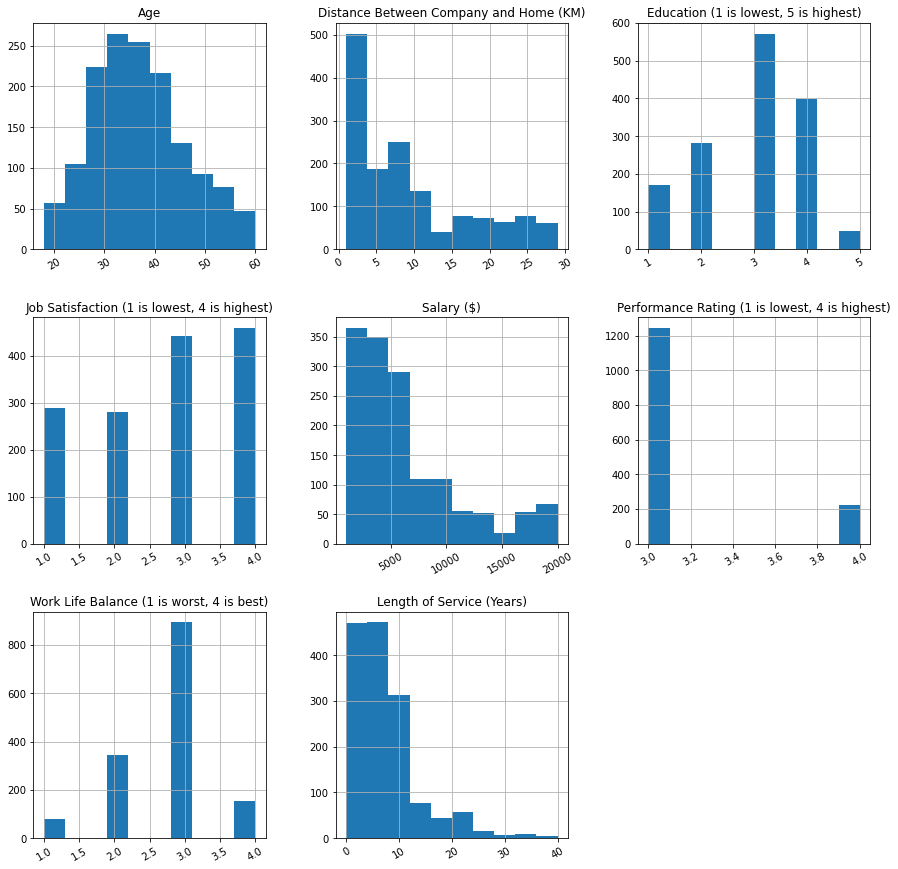

In [ ]:
df.hist(figsize=(15,15),xrot=30)
plt.show()

<AxesSubplot:>

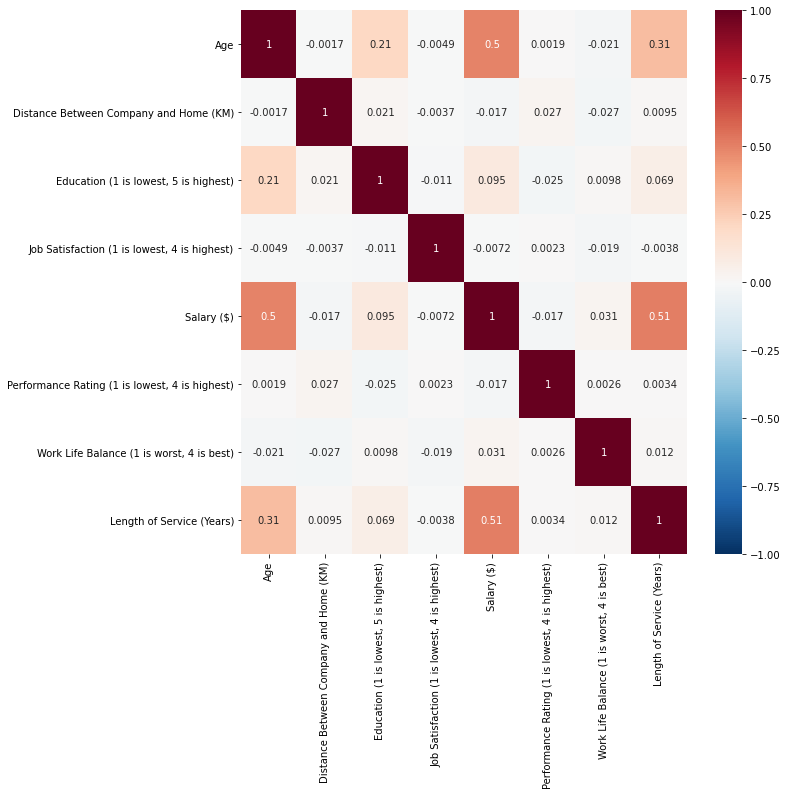

In [ ]:
corr=df.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)

<h2>Outliers

<AxesSubplot:xlabel='Job Function', ylabel='Length of Service (Years)'>

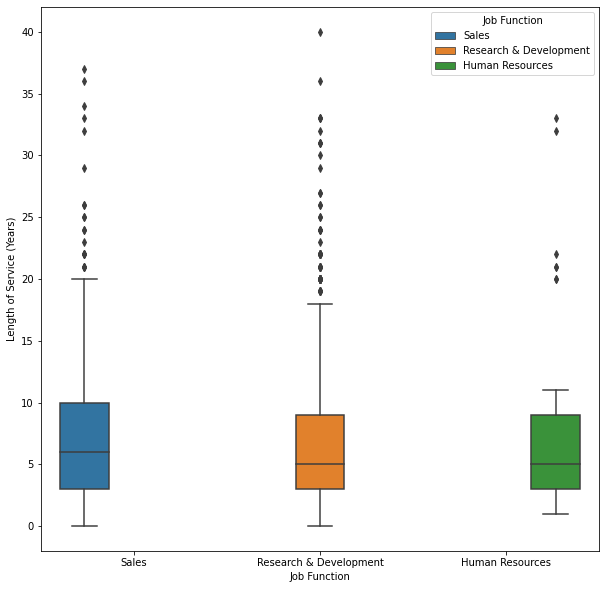

In [ ]:
plt.figure(figsize=(10,10))  
sns.boxplot(x='Job Function',y='Length of Service (Years)',hue='Job Function',data=df)

<AxesSubplot:ylabel='Salary ($)'>

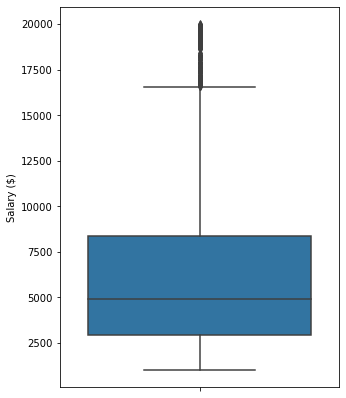

In [ ]:
plt.figure(figsize=(5,7))  
sns.boxplot(y="Salary ($)", data=df)

<h2>Distribution of salary across departments and genders

In [ ]:
df['Job Function'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Job Function, dtype: int64

<AxesSubplot:xlabel='Job Function', ylabel='Salary ($)'>

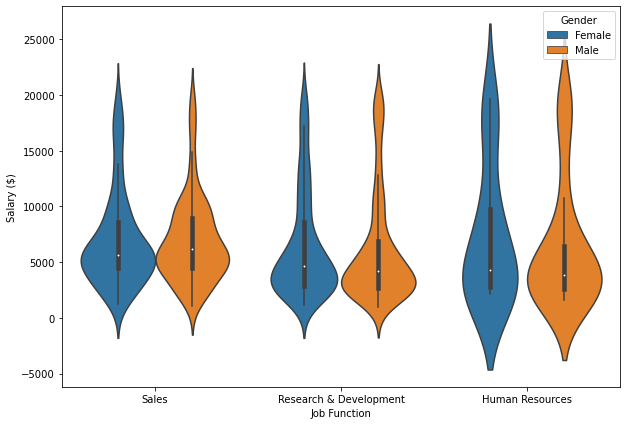

In [ ]:
plt.figure(figsize=(10,7))  
sns.violinplot(x='Job Function',y='Salary ($)',hue='Gender',data=df)

<h2>Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
unscaled_df=df.copy()
df_transform=df[['Age','Distance Between Company and Home (KM)','Salary ($)','Length of Service (Years)']]
centroid_plot=df_transform.copy()
df.drop(['Age','Distance Between Company and Home (KM)','Salary ($)','Length of Service (Years)'],axis=1,inplace=True)
catdf=df.copy()
df_transform_scaled=scaler.fit_transform(df_transform)

df_transform_scaled=pd.DataFrame(columns=df_transform.columns,data=df_transform_scaled)

<h3>Column index for all categorical columns

In [ ]:
catdf

,Gender,BusinessTravel,Job Function,"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",MaritalStatus,"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Resign Status
0,Female,Travel_Rarely,Sales,2,4,Single,3,1,Yes
1,Male,Travel_Frequently,Research & Development,1,2,Married,4,3,No
2,Male,Travel_Rarely,Research & Development,2,3,Single,3,3,Yes
3,Female,Travel_Frequently,Research & Development,4,3,Married,3,3,No
4,Male,Travel_Rarely,Research & Development,1,2,Married,3,3,No
...,...,...,...,...,...,...,...,...,...
1465,Male,Travel_Frequently,Research & Development,2,4,Married,3,3,No
1466,Male,Travel_Rarely,Research & Development,1,1,Married,3,3,No
1467,Male,Travel_Rarely,Research & Development,3,2,Married,4,3,No
1468,Male,Travel_Frequently,Sales,3,2,Married,3,2,No


In [ ]:
print(list)

<class 'list'>


In [ ]:
catColumnsPos = [catdf.columns.get_loc(column)for column in list(catdf.columns)]
#get location for all categorical
print('Categorical and Discrete columns : {}'.format(list(catdf.columns)))

Categorical and Discrete columns : ['Gender', 'BusinessTravel', 'Job Function', 'Education (1 is lowest, 5 is highest)', 'Job Satisfaction (1 is lowest, 4 is highest)', 'MaritalStatus', 'Performance Rating (1 is lowest, 4 is highest)', 'Work Life Balance (1 is worst, 4 is best)', 'Resign Status']


In [ ]:
df=pd.concat([df,df_transform_scaled],axis=1)
df 

,Gender,BusinessTravel,Job Function,"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",MaritalStatus,"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Resign Status,Age,Distance Between Company and Home (KM),Salary ($),Length of Service (Years)
0,Female,Travel_Rarely,Sales,2,4,Single,3,1,Yes,0.446350,-1.010909,-0.108350,-0.164613
1,Male,Travel_Frequently,Research & Development,1,2,Married,4,3,No,1.322365,-0.147150,-0.291719,0.488508
2,Male,Travel_Rarely,Research & Development,2,3,Single,3,3,Yes,0.008343,-0.887515,-0.937654,-1.144294
3,Female,Travel_Frequently,Research & Development,4,3,Married,3,3,No,-0.429664,-0.764121,-0.763634,0.161947
4,Male,Travel_Rarely,Research & Development,1,2,Married,3,3,No,-1.086676,-0.887515,-0.644858,-0.817734
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Male,Travel_Frequently,Research & Development,2,4,Married,3,3,No,-0.101159,1.703764,-0.835451,-0.327893
1466,Male,Travel_Rarely,Research & Development,1,1,Married,3,3,No,0.227347,-0.393938,0.741140,-0.001333
1467,Male,Travel_Rarely,Research & Development,3,2,Married,4,3,No,-1.086676,-0.640727,-0.076690,-0.164613
1468,Male,Travel_Frequently,Sales,3,2,Married,3,2,No,1.322365,-0.887515,-0.236474,0.325228


<h2>Feature Selection

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
feat_df=df.copy()
y=feat_df['Resign Status'].values
feat_df=pd.get_dummies(feat_df,drop_first=True)
X=feat_df.drop(['Resign Status_Yes'],axis=1).values #features
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
# importance of more than 0.05
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100),threshold=0.05)

sel.fit(X_train, y_train)
#see which feats are impt
sel.get_support()
# make a list and count the selected features
selected_feat= feat_df.drop(['Resign Status_Yes'],axis=1).columns[(sel.get_support())]
len(selected_feat)


7

In [ ]:
selected_feat

Index(['Education (1 is lowest, 5 is highest)',
       'Job Satisfaction (1 is lowest, 4 is highest)',
       'Work Life Balance (1 is worst, 4 is best)', 'Age',
       'Distance Between Company and Home (KM)', 'Salary ($)',
       'Length of Service (Years)'],
      dtype='object')

In [ ]:
feat_select=df[selected_feat]
feat_select['Resign Status']=df['Resign Status']

<ipython-input-458-ebd2c52cfa6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_select['Resign Status']=df['Resign Status']


<h2>FAMD

In [ ]:
from prince import FAMD
famd=FAMD(n_components=16,n_iter=3,random_state=42)
famd=famd.fit(df)

In [ ]:
#famd analysis
total_inert=famd.total_inertia_
inert=famd.explained_inertia_ #explained variance
eigen=famd.eigenvalues_
cumulative_explained=np.cumsum(inert)
print(cumulative_explained) #total explained variance
famd_g=pd.DataFrame({'Eigenvalues':eigen,'Explained Variance':inert,'Cumulative Explained Variance':cumulative_explained})

[0.1307896  0.20825451 0.27897997 0.34924307 0.41733855 0.48326086
 0.54799737 0.61114798 0.67212646 0.73093511 0.78832899 0.84066302
 0.88991138 0.93287919 0.97377542 1.        ]


In [ ]:
famd_g

,Eigenvalues,Explained Variance,Cumulative Explained Variance
0,0.000721,0.130790,0.130790
1,0.000427,0.077465,0.208255
2,0.000390,0.070725,0.278980
3,0.000387,0.070263,0.349243
4,0.000375,0.068095,0.417339
5,0.000363,0.065922,0.483261
6,0.000357,0.064737,0.547997
7,0.000348,0.063151,0.611148
8,0.000336,0.060978,0.672126
9,0.000324,0.058809,0.730935


<AxesSubplot:ylabel='Explained Variance'>

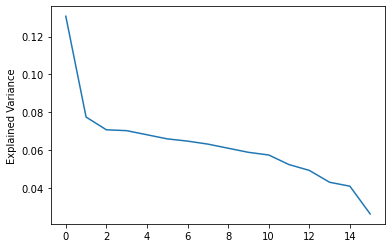

In [ ]:
sns.lineplot(data=famd_g,x=famd_g.index,y='Explained Variance')

In [ ]:
famd=FAMD(n_components=2,n_iter=3,random_state=42)
famd=famd.fit(df)

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (13.07% inertia)', ylabel='Component 1 (7.51% inertia)'>

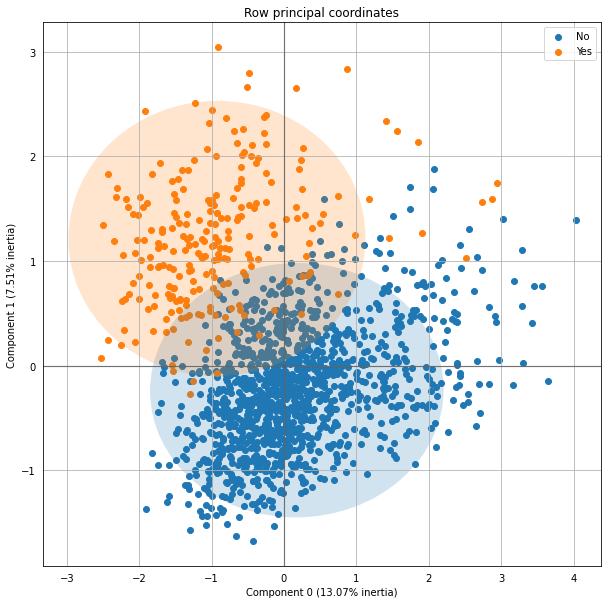

In [ ]:
famd.plot_row_coordinates(df,figsize=(10,10),color_labels=df['Resign Status'])

<h2>Hierarchical clustering

In [ ]:
import gower 
from scipy.spatial.distance import squareform #gower and famd dont work well tgt as distance is calc differently, agglomerative will calc dist with euclidian
gower_d_m=gower.gower_matrix(feat_select)
gower_d=squareform(gower_d_m) #condensed distance matrix for dendrogram to fit

<h2>Dendrogram to see how many clusters and height to use and method

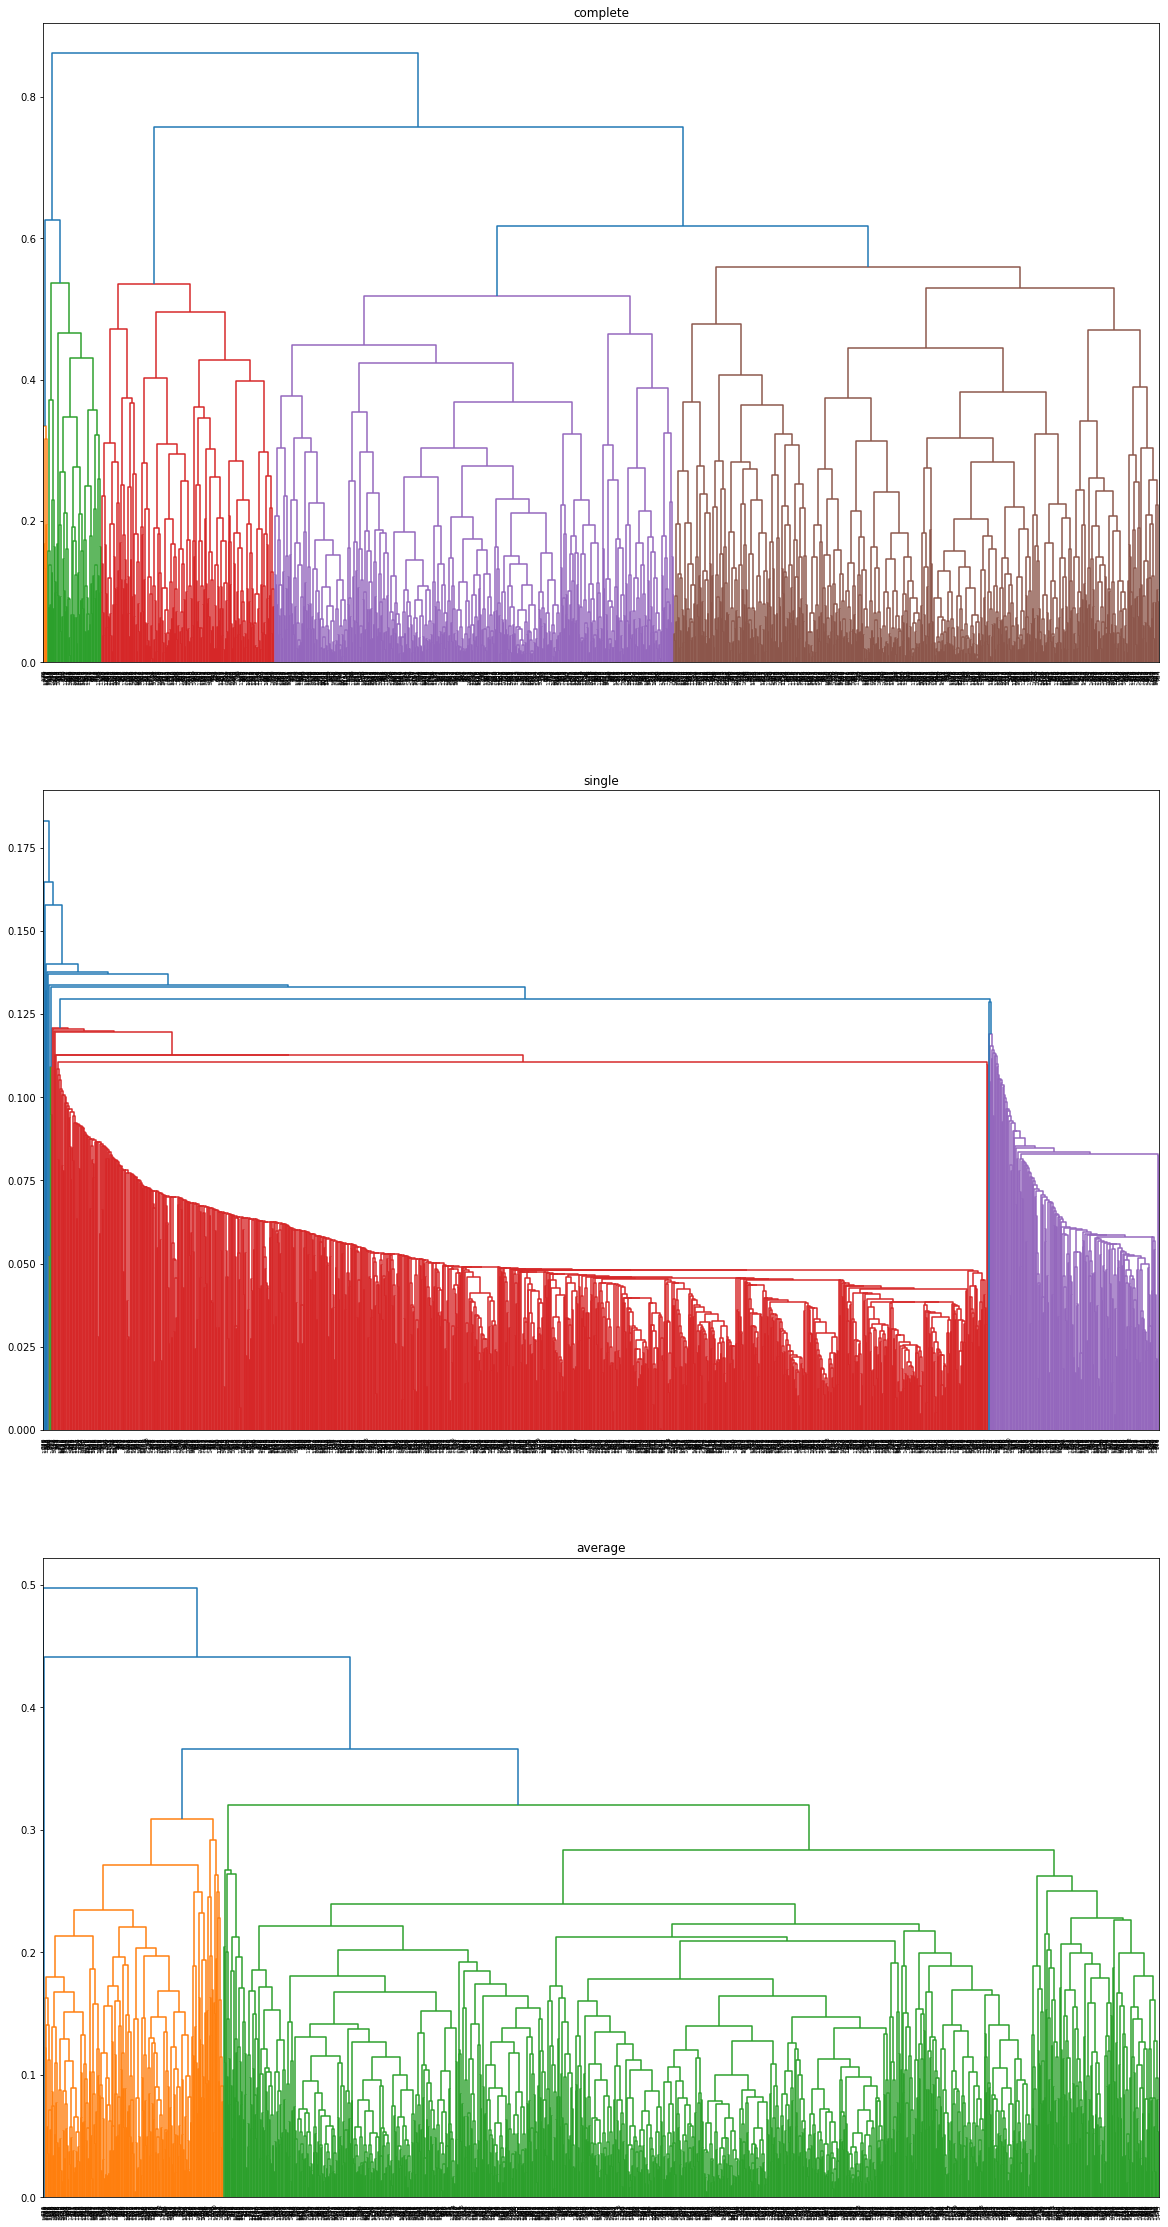

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

fig,axes=plt.subplots(3,1,sharey=False,figsize=(20,40))
methods=['complete','single','average'] #ward uses euclidean distance
for i in range(len(methods)):
    axes[i].set_title(methods[i])
    link=linkage(gower_d, method=methods[i])
    dendrogram(link,
    labels=df.index,
    leaf_rotation=90,
    leaf_font_size=6,ax=axes[i])
    
plt.axhline(y=0.7,color='b',linestyle='--')


plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(distance_threshold=0.7,n_clusters=None,affinity='precomputed',linkage='complete')
labels = hierarchical_cluster.fit_predict(gower_d_m) 

<h3>Evaluation of Dendrogram

In [ ]:
cross=pd.DataFrame({'Resign Status':df['Resign Status'],'Labels':labels})

In [ ]:
aggounscaled_df=unscaled_df.copy()
aggounscaled_df['Labels']=labels

In [ ]:
# Add the cluster to the dataframe
aggounscaled_df['Segment'] = aggounscaled_df['Labels'].map({0:'First', 1:'Second', 2:'Third'})
# Order the cluster
aggounscaled_df['Segment'] = aggounscaled_df['Segment'].astype('category')
aggounscaled_df['Segment'] = aggounscaled_df['Segment'].cat.reorder_categories(['First','Second','Third'])

<h3>Characteristics based off mean and mode

In [ ]:
aggounscaled_df.groupby('Segment').agg(
    {
        'Labels':'count',
        'Gender': lambda x: x.value_counts().index[0],
        'BusinessTravel': lambda x: x.value_counts().index[0],
        'Job Function':lambda x: x.value_counts().index[0],
        'MaritalStatus': lambda x: x.value_counts().index[0],
        'Education (1 is lowest, 5 is highest)': lambda x: x.value_counts().index[0],
        'Job Satisfaction (1 is lowest, 4 is highest)':lambda x: x.value_counts().index[0],
        'Performance Rating (1 is lowest, 4 is highest)':lambda x: x.value_counts().index[0],
        'Work Life Balance (1 is worst, 4 is best)':lambda x: x.value_counts().index[0],
        'Age':lambda x: x.value_counts().index[0],
        'Distance Between Company and Home (KM)': 'mean',
        'Salary ($)': 'mean',
        'Length of Service (Years)': 'mean',
        # 'Resign Status':lambda x: x.value_counts().index[0]
    }
).reset_index()

,Segment,Labels,Gender,BusinessTravel,Job Function,MaritalStatus,"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)","Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Age,Distance Between Company and Home (KM),Salary ($),Length of Service (Years)
0,First,77,Male,Travel_Rarely,Research & Development,Married,4,2,3,3,50,10.896104,16384.792208,18.038961
1,Second,1165,Male,Travel_Rarely,Research & Development,Married,3,4,3,3,35,8.773391,6272.592275,6.803433
2,Third,228,Male,Travel_Rarely,Research & Development,Single,3,3,3,3,29,10.758772,4342.587719,4.328947


<h2>Characteristics based off Mean of all numerical variables

In [ ]:
aggounscaled_df.groupby('Labels').mean()

,Age,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years)
Labels,,,,,,,,
0,48.896104,10.896104,3.428571,2.142857,16384.792208,3.129870,2.818182,18.038961
1,36.920172,8.773391,2.896996,2.821459,6272.592275,3.153648,2.776824,6.803433
2,32.899123,10.758772,2.820175,2.451754,4342.587719,3.162281,2.662281,4.328947


In [ ]:
pd.crosstab(cross['Labels'],cross['Resign Status'])

Resign Status,No,Yes
Labels,,
0,68,9
1,1165,0
2,0,228


<h2>K-Prototype

In [ ]:
dfmatrix=df.to_numpy() #better format for k-proto

<h2>Choose optimal K using Elbow method and silhouette

In [ ]:
cost=[]
silhouette=[]
kprototype=KPrototypes(n_jobs=-1,n_clusters=1,init='Huang',random_state=42)
kprototype.fit_predict(dfmatrix, categorical = catColumnsPos)
cost.append(kprototype.cost_)
for cluster in range(2,10):
    kprototype=KPrototypes(n_jobs=-1,n_clusters=cluster,init='Huang',random_state=42)

    #had to sep fit and predict to get sil score
    kprototype.fit(dfmatrix, categorical = catColumnsPos)
    labels=kprototype.labels_
    sil_score=silhouette_score(df_transform_scaled,labels,metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(cluster,
    sil_score))
    #For screeplot
    kprototype.predict(dfmatrix, categorical = catColumnsPos)
    cost.append(kprototype.cost_)
    silhouette.append(sil_score)

For n_clusters=2, The Silhouette Coefficient is 0.387
For n_clusters=3, The Silhouette Coefficient is 0.325
For n_clusters=4, The Silhouette Coefficient is 0.320
For n_clusters=5, The Silhouette Coefficient is 0.258
For n_clusters=6, The Silhouette Coefficient is 0.262
For n_clusters=7, The Silhouette Coefficient is 0.259
For n_clusters=8, The Silhouette Coefficient is 0.193
For n_clusters=9, The Silhouette Coefficient is 0.214


In [ ]:
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})
df_sil= pd.DataFrame({'Cluster':range(2, 10), 'Silhouette':silhouette})
df_cost

,Cluster,Cost
0,1,8515.000000
1,2,6677.734877
2,3,5741.211117
3,4,5197.486574
4,5,4822.238161
5,6,4531.345898
6,7,4352.639327
7,8,4221.605052
8,9,4115.432957


<h2>Graph of silhouette and cost

<AxesSubplot:xlabel='Cluster', ylabel='Silhouette'>

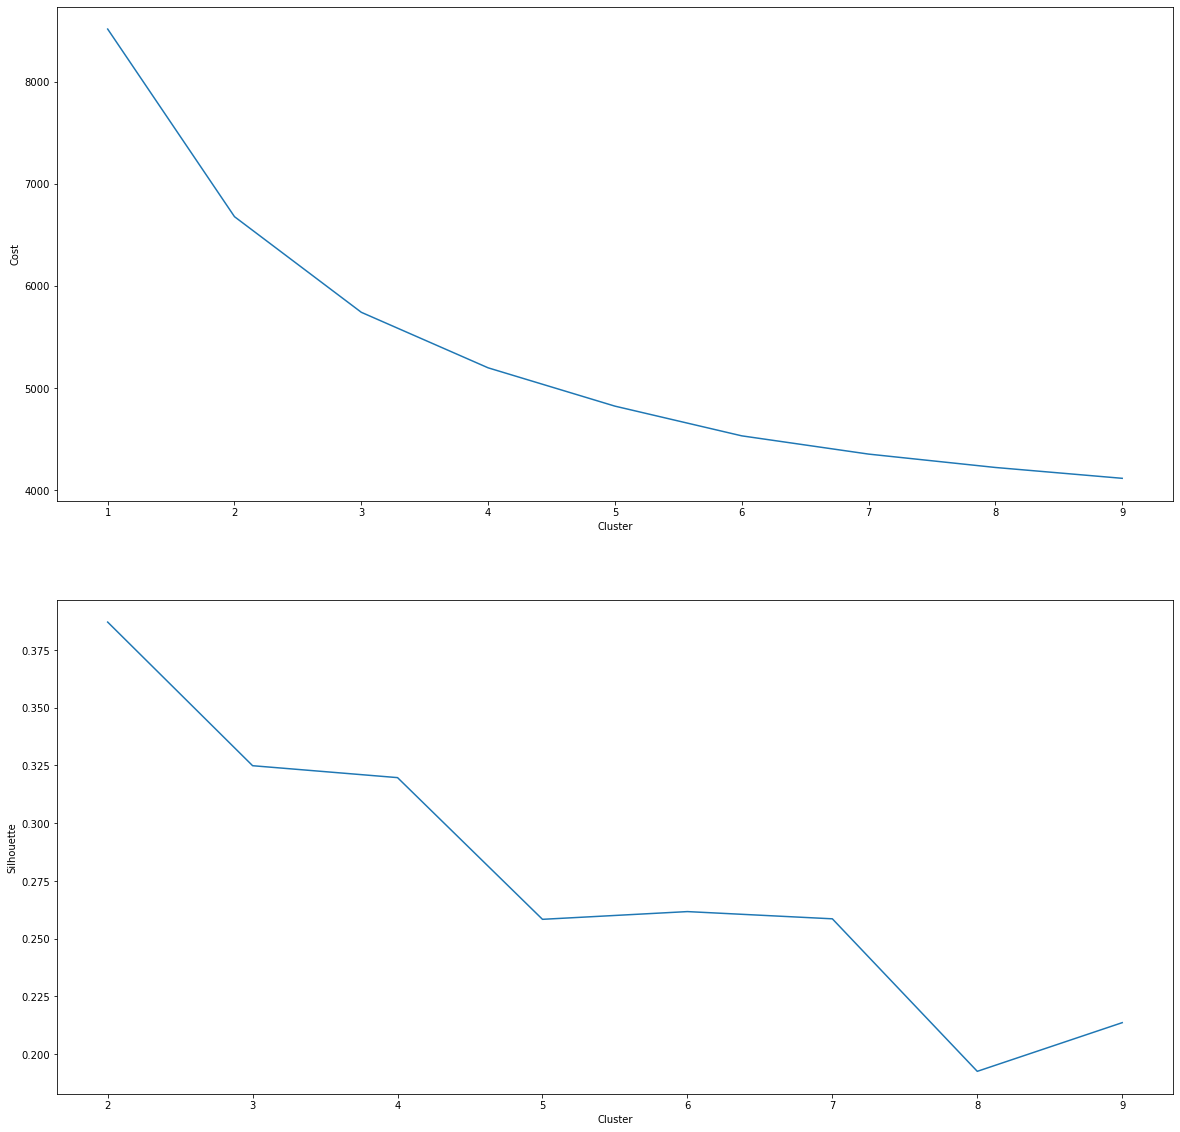

In [ ]:
fig,axes=plt.subplots(2,1,sharey=False,figsize=(20,20))
sns.lineplot(x='Cluster',y='Cost',data=df_cost,ax=axes[0])
sns.lineplot(x='Cluster',y='Silhouette',data=df_sil,ax=axes[1])

<h2> 4 clusters

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 42)
c=kprototype.fit_predict(dfmatrix, categorical = catColumnsPos)

In [ ]:
# Cluster centorid
centroid=pd.DataFrame(kprototype.cluster_centroids_)

In [ ]:
# Add the cluster to the dataframe
unscaled_df['Cluster Labels'] = kprototype.labels_
unscaled_df['Segment'] = unscaled_df['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third',3:'Fourth'})
# Order the cluster
unscaled_df['Segment'] = unscaled_df['Segment'].astype('category')
unscaled_df['Segment'] = unscaled_df['Segment'].cat.reorder_categories(['First','Second','Third','Fourth'])

In [ ]:
#cluster intepretation numerical using the average while the categorical using the mode. 

unscaled_df.groupby('Segment').agg(
    {
        'Cluster Labels':'count',
        'Gender': lambda x: x.value_counts().index[0],
        'BusinessTravel': lambda x: x.value_counts().index[0],
        'Job Function':lambda x: x.value_counts().index[0],
        'MaritalStatus': lambda x: x.value_counts().index[0],
        'Education (1 is lowest, 5 is highest)': lambda x: x.value_counts().index[0],
        'Job Satisfaction (1 is lowest, 4 is highest)':lambda x: x.value_counts().index[0],
        'Performance Rating (1 is lowest, 4 is highest)':lambda x: x.value_counts().index[0],
        'Work Life Balance (1 is worst, 4 is best)':lambda x: x.value_counts().index[0],
        'Age':lambda x: x.value_counts().index[0],
        'Distance Between Company and Home (KM)': 'mean',
        'Salary ($)': 'mean',
        'Length of Service (Years)': 'mean',
        # 'Resign Status':lambda x: x.value_counts().index[0]
    }
).reset_index()

,Segment,Cluster Labels,Gender,BusinessTravel,Job Function,MaritalStatus,"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)","Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Age,Distance Between Company and Home (KM),Salary ($),Length of Service (Years)
0,First,139,Male,Travel_Rarely,Research & Development,Married,3,3,3,3,40,8.654676,14805.302158,21.223022
1,Second,759,Male,Travel_Rarely,Research & Development,Married,3,4,3,3,34,5.191041,4441.034256,5.333333
2,Third,269,Male,Travel_Rarely,Research & Development,Married,4,4,3,3,46,6.613383,9493.910781,5.706320
3,Fourth,303,Male,Travel_Rarely,Research & Development,Married,3,3,3,3,35,21.752475,5203.844884,5.838284


In [ ]:
pd.crosstab(unscaled_df['Cluster Labels'],unscaled_df['Resign Status'])

Resign Status,No,Yes
Cluster Labels,,
0,126,13
1,632,127
2,244,25
3,231,72


In [ ]:
centroid=unscaled_df.groupby('Cluster Labels').mean()

In [ ]:
centroid

,Age,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years)
Cluster Labels,,,,,,,,
0,45.215827,8.654676,2.956835,2.640288,14805.302158,3.143885,2.812950,21.223022
1,32.073781,5.191041,2.836627,2.736495,4441.034256,3.148880,2.774704,5.333333
2,48.881041,6.613383,3.189591,2.788104,9493.910781,3.152416,2.769517,5.706320
3,34.653465,21.752475,2.838284,2.696370,5203.844884,3.171617,2.696370,5.838284


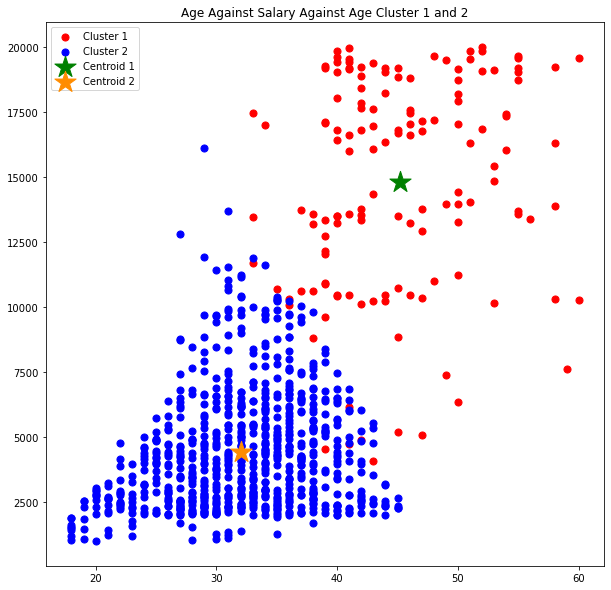

In [ ]:
cluster0=unscaled_df[unscaled_df['Cluster Labels']==0]
cluster1=unscaled_df[unscaled_df['Cluster Labels']==1]
plt.figure(figsize=(10,10))
plt.title('Age Against Salary Against Age Cluster 1 and 2')
#plot cluster 
plt.scatter(x=cluster0['Age'],y=cluster0['Salary ($)'],s=50,color='red',label='Cluster 1')
plt.scatter(x=cluster1['Age'],y=cluster1['Salary ($)'],s=50,color='blue',label='Cluster 2')
#plot cluster centroids

plt.scatter(x=centroid.iloc[0,0],y=centroid.iloc[0,4],s=500,color='green',marker='*',label='Centroid 1')
plt.scatter(x=centroid.iloc[1,0],y=centroid.iloc[1,4],s=500,color='darkorange',marker='*',label='Centroid 2')
plt.legend()

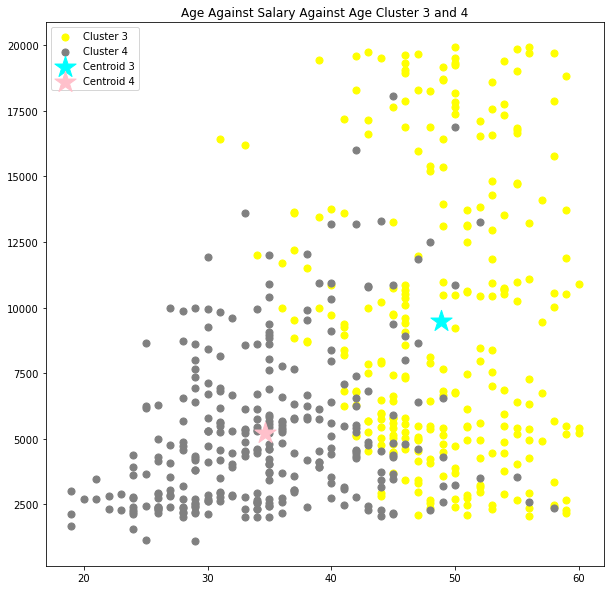

In [ ]:
cluster2=unscaled_df[unscaled_df['Cluster Labels']==2]
cluster3=unscaled_df[unscaled_df['Cluster Labels']==3]
plt.figure(figsize=(10,10))
plt.title('Age Against Salary Against Age Cluster 3 and 4')

plt.scatter(x=cluster2['Age'],y=cluster2['Salary ($)'],s=50,color='yellow',label='Cluster 3')
plt.scatter(x=cluster3['Age'],y=cluster3['Salary ($)'],s=50,color='grey',label='Cluster 4')
plt.scatter(x=centroid.iloc[2,0],y=centroid.iloc[2,4],s=500,color='cyan',marker='*',label='Centroid 3')
plt.scatter(x=centroid.iloc[3,0],y=centroid.iloc[3,4],s=500,color='pink',marker='*',label='Centroid 4')
plt.legend()